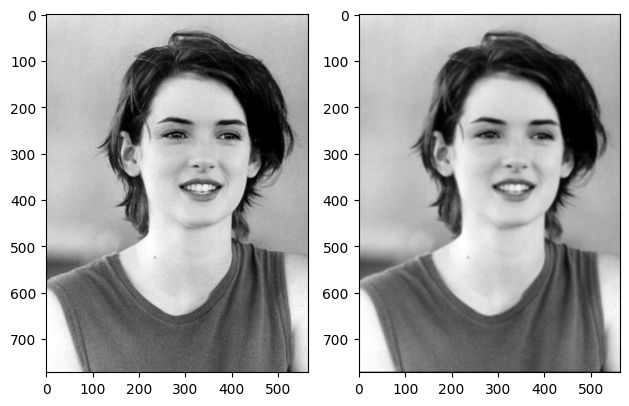

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)
# Enter your code here.
kernel_size = 5
stride = 1
pad = int((kernel_size-1) / 2)

#step 2
inputs = tf.keras.Input((None, None, 1))

#step 3
outputs = Conv2D(1, kernel_size, stride, padding='same', name='conv1')(inputs)

#step 4
filter_net = tf.keras.Model(inputs, outputs)

#step 5
weights = np.ones((kernel_size, kernel_size, 1, 1)) / (kernel_size**2)
bias = np.array([0])
filter_net.get_layer('conv1').set_weights([weights, bias])

#step 6
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)

#step 7
# img_batch = np.expand_dims(img, axis=(0,-1))
img_batch = np.expand_dims(img, axis=0)

#step 8
img_out = filter_net(img_batch)
img_out = np.reshape(img_out, (772, 564))
img_out = np.array(img_out, dtype=np.uint8)

#step 9
plt.subplot(121) #創建一個1*2的子圖  121代表第一行第2列第一張圖
plt.imshow(img, cmap='gray')
plt.subplot(122) #第一行第2列第二張圖
plt.imshow(img_out, cmap='gray')
plt.tight_layout()
plt.show()







#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?

#會變得更模糊，因為使用更大的kernel，每一個輸出像素會考慮更多鄰近像素(做平均)。這種平均效果會使圖像的細節和邊緣變得更加模糊,因為高頻信息(邊緣)會被濾掉。





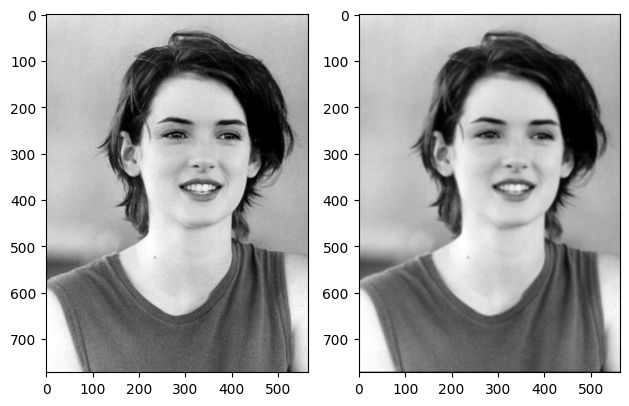

In [42]:
# Steps 10~13 (15 points)
# Enter your code here.

kernel_size = 5
stride = 1


#step 10
pad = int((kernel_size-1) / 2)

img_pad = np.zeros((772 + 2*pad, 564 + 2*pad))
img_pad[pad:pad+img.shape[0], pad:pad+img.shape[1]] = img


#step 11
inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding='valid', name='conv1')(inputs)
filter_net = tf.keras.Model(inputs, outputs)
filter_net.get_layer('conv1').set_weights([weights, bias])


#step 12
img_batch = np.expand_dims(img_pad, axis=0)


#step 13
img_out = filter_net(img_batch)
img_out = np.reshape(img_out, (772, 564))
img_out = np.array(img_out, dtype=np.uint8)


plt.subplot(121) 
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_out, cmap='gray')
plt.tight_layout()
plt.show()




# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?

#他們只有padding的方式是不同的，但他們執行的卷積操作是等價的，所以產生的結果相同。
#Method 1中，在進行卷積前，Conv2D會自動計算padding在進行卷積。
#Method 2中，我們先人工計算padding，將周圍填充為0，然後再卷積。